# Multivariate Polynomial Regression Optimization

Used for plugging in synthetic optimization dataset to find the optimal value for parameters

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy
import math

### Function Definitions

Returns the Linear Regression Equation for the model in a readable format

In [2]:
def getEq(weights, cols, intercept):
    return ('Formula: y =  {} + {}({}) + {}({}) + {}({}) + {}({})'.format(intercept, weights[0], cols[0], weights[1], cols[1], weights[2], cols[2], weights[3], cols[3]))

#### Cleaning Data

In [3]:
cols =['Temp','Speed','Distance','Pressure']
dataset = pd.read_csv('../DataSets/deviceSummary.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
splitRatio = 0.25

#For full dataset of 100,000
#generatedDataset = pd.read_csv('../Datasets/optimizedSyntheticDataset.csv')
#genData = generatedDataset.iloc[:, 0:-1].values

#For subset of 4,900
generatedDataset = pd.read_csv('../DataSets/machineAcceptingOptimizedSynthetic.csv') #4000 data samples
genData = generatedDataset.iloc[:, 1:-1].values #Remove Trial Number and Efficiency Score


#### Spliting Classes

#### Calculating Regressions

In [4]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)
poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = splitRatio, random_state = 4)
regression = linear_model.LinearRegression()
model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)
prediction = model.predict(poly_var_test)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(res_test, prediction)
print("R Value: " + str(r_value))
print("R-Squared: " + str(r_value*r_value))
print("Std-Err: " + str(std_err))
polyData = poly.fit_transform(genData)
optimal = model.predict(polyData)
print('')

R Value: 0.8308480889045943
R-Squared: 0.6903085468364166
Std-Err: 0.09479068891768234



In [5]:
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  1.59667618e-03 -3.46531973e-03  4.67681265e-04
  5.38036602e-05  4.89211178e-04 -3.07095352e-03  4.39144218e-02
  2.69018301e-03 -2.66721921e-04  4.58949517e-02  8.07054903e-03
 -8.03653483e-01  3.76625621e-04 -1.36455810e-01]
9.34325541791858


In [6]:
effToParam = {}
for i in range(len(optimal)):
    effToParam[optimal[i]] = genData[i]

### Sorting
Sorts and Returns Params for Highest Efficiency Combinations

In [7]:
optimal.sort()
optimal = np.flip(optimal)
numParams = 50
print("Printing Top {} Combinations of Paramaters".format(numParams))
print("Order is as follows:")
print("Efficiency,\t\t Temp, Speed, Distance Pressure")
print('-'*35)
for i in range(numParams):
    print(optimal[i], '\t',  str(effToParam[optimal[i]]))

Printing Top 50 Combinations of Paramaters
Order is as follows:
Efficiency,		 Temp, Speed, Distance Pressure
-----------------------------------
14.417319942608026 	 [ 50. 200.   7.   6.]
14.394703556856722 	 [ 50. 200.   7.   7.]
14.167024709167668 	 [ 50. 200.   7.   5.]
14.099175551913744 	 [ 50. 200.   7.   8.]
13.880720936627075 	 [ 50. 195.   7.   6.]
13.817751805737647 	 [ 50. 195.   7.   7.]
13.739956561697905 	 [ 50. 200.   8.   6.]
13.717716801567889 	 [ 50. 200.   8.   7.]
13.670778448324839 	 [ 50. 195.   7.   5.]
13.643817856535643 	 [ 50. 200.   7.   4.]
13.530735927779112 	 [ 50. 200.   7.   9.]
13.489284702636251 	 [ 50. 200.   8.   5.]
13.487376357937928 	 [ 50. 200.   6.   6.]
13.481871055656546 	 [ 50. 195.   7.   8.]
13.464383346565333 	 [ 50. 200.   6.   7.]
13.422565422246194 	 [ 50. 200.   8.   8.]
13.330785834598078 	 [ 50. 190.   7.   6.]
13.237457750118857 	 [ 50. 200.   6.   5.]
13.22889592413657 	 [ 55. 200.   7.   6.]
13.227463958570521 	 [ 50. 190.   7.   

#### Calculating Statistical Values

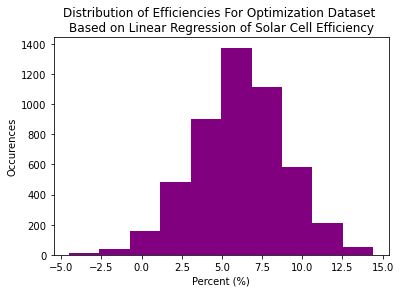

In [8]:
plt.hist(optimal, color='purple')
plt.title('Distribution of Efficiencies For Optimization Dataset \nBased on Linear Regression of Solar Cell Efficiency')
plt.xlabel('Percent (%)')
plt.ylabel('Occurences')
print('')

#### Graphing Results

R Value: 0.6660133157910396
R-Squared: 0.44357373681097506
Std-Err: 0.11888756484855899
RMSE: 1.9125657738250017
0
0
R Value: 0.8308480889045943
R-Squared: 0.6903085468364166
Std-Err: 0.09479068891768234
RMSE: 1.404864757497459
0
1
R Value: 0.9035338164021743
R-Squared: 0.8163733573822781
Std-Err: 0.08209027241726752
RMSE: 1.098356392694196
0
2
R Value: 0.9180357285078597
R-Squared: 0.8427895988169568
Std-Err: 0.07582910867967792
RMSE: 1.0005174500621137
1
0
R Value: 0.9184232768640735
R-Squared: 0.8435013154857427
Std-Err: 0.0763544126674245
RMSE: 1.0002648396058829
1
1


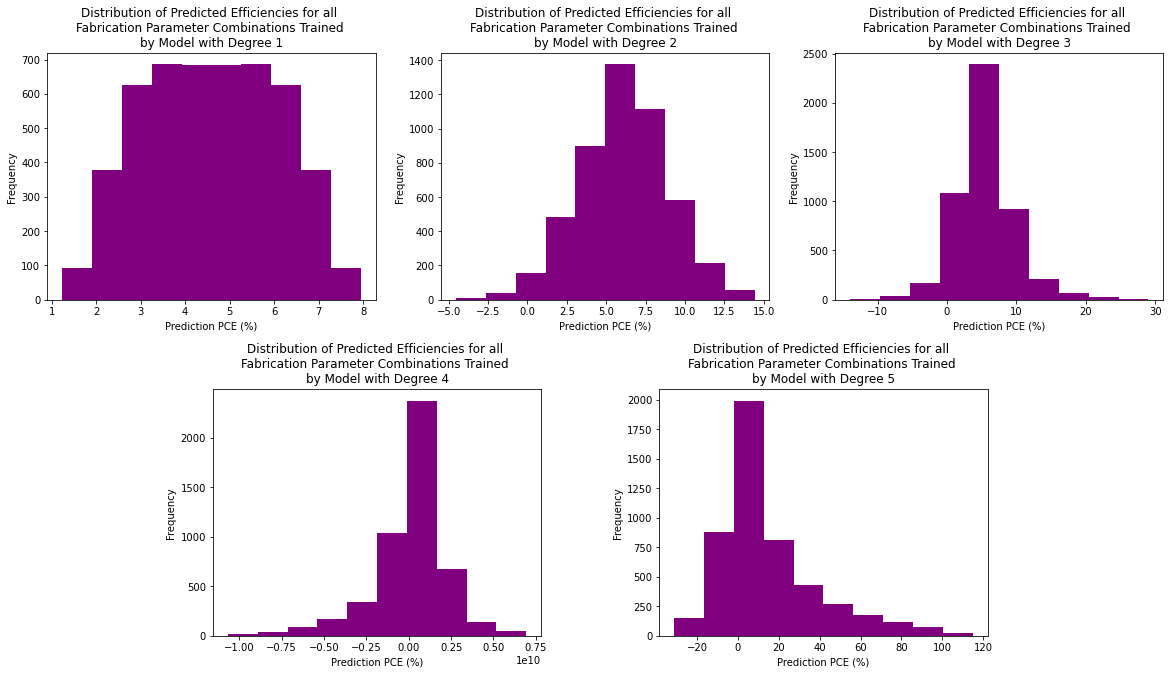

In [11]:

fig, ax = plt.subplots(2,3, figsize=(20,10))
ax[1][2].set_visible(False)
ax[1][0].set_position([0.24,0.07,0.228,0.343])
ax[1][1].set_position([0.55,0.07,0.228,0.343])
counter = 0
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    poly_variables = poly.fit_transform(X)
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = splitRatio, random_state = 4)
    regression = linear_model.LinearRegression()
    model = regression.fit(poly_var_train, res_train)
    score = model.score(poly_var_test, res_test)
    prediction = model.predict(poly_var_test)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(res_test, prediction)
    mse = metrics.mean_squared_error(res_test, prediction)
    rmse = math.sqrt(mse)
    polyData = poly.fit_transform(genData)
    optimal = model.predict(polyData)
    ax[int(counter / 3), (counter % 3)].hist(optimal, color='purple')
    ax[int(counter / 3), (counter % 3)].set_title("Distribution of Predicted Efficiencies for all \nFabrication Parameter Combinations Trained \nby Model with Degree " + str(i))
    ax[int(counter / 3), (counter % 3)].set_ylabel("Frequency")
    ax[int(counter / 3), (counter % 3)].set_xlabel("Prediction PCE (%)")
    print("R Value: " + str(r_value))
    print("R-Squared: " + str(r_value*r_value))
    print("Std-Err: " + str(std_err))
    print('RMSE: ' + str(rmse))
    print(int(counter / 3))
    print((counter % 3))
    counter += 1
    
plt.show()